In [2]:
import pandas as pd

In [3]:
stocks = pd.read_csv("https://bit.ly/smallstocks")

In [3]:
stocks.sample(5)

,Date,Close,Volume,Symbol
5,2016-10-04,31.35,18460400,CSCO
0,2016-10-03,31.50,14070500,CSCO
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
8,2016-10-05,113.05,21453100,AAPL


In [4]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [5]:
ser = stocks.groupby(["Symbol", "Date"])["Close"].mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [6]:
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [7]:
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [4]:
df = stocks.pivot_table(values="Close", index="Symbol", columns="Date")
df

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [9]:
df.index

Index(['AAPL', 'CSCO', 'MSFT'], dtype='object', name='Symbol')

In [10]:
stocks.head(3)

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT


## Generiamo il Multiindex per il dataframe originale

In [15]:
stocks.set_index(["Symbol", "Date"], inplace=True)

In [16]:
stocks.sort_index(inplace=True)
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [17]:
stocks.loc["AAPL"] # la ricerca viene effettuata su Index

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [ ]:
stocks.query("Symbol == 'AAPL'")

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100

In [21]:
stocks.loc[("AAPL", "2016-10-03"), :] # i : indicano quali elementi, colonne, visualizzare

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [22]:
stocks.loc[("AAPL", "2016-10-03"), "Close"] # i : indicano quali elementi, colonne, visualizzare

112.52

In [24]:
stocks.loc[(["AAPL", "MSFT"]), "2016-10-03", :]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500


In [25]:
stocks.loc[(["AAPL", "MSFT"]), ["2016-10-03", "2016-10-04"], :]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

In [31]:
stocks.loc[(slice(None), ["2016-10-03", "2016-10-04"]),:]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

In [104]:
stocks.head(2)

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL


## Troviamo i 3 valori max di Volume (o altre colonne numeriche)

In [46]:
stocks.Volume.nlargest(n=3) # indichiamo esplicitamente la Series su cui cercare

3    29736800
1    21701800
8    21453100
Name: Volume, dtype: int64

In [58]:
# indichiamo la colonna su cui cercare ma stampiamo tutto il DF
stocks.nlargest(n=3, columns=["Volume"])

,Date,Close,Volume,Symbol
3,2016-10-04,113.00,29736800,AAPL
1,2016-10-03,112.52,21701800,AAPL
8,2016-10-05,113.05,21453100,AAPL


## Troviamo il maggior valore in Volume dopo in raggruppamento by Simbolo

In [118]:
v_max = stocks.groupby(["Symbol"], as_index=True)["Volume"].nlargest(n=1)
v_max



Symbol   
AAPL    3    29736800
CSCO    5    18460400
MSFT    4    20085900
Name: Volume, dtype: int64

<AxesSubplot:ylabel='Symbol,None'>

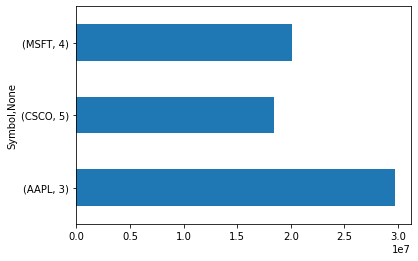

In [113]:
v_max.plot(kind="barh")